In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
#import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
#from classy import Class
%matplotlib inline
#import s1 
import ST
from scipy.integrate import trapz

In [2]:

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
hp.pix2ang

<function healpy.pixelfunc.pix2ang(nside, ipix, nest=False, lonlat=False)>

In [4]:
sz_milca_map  = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_CompMap_Compton-SZMap-milca-ymaps_2048_R2.00.fits")


In [5]:

sz_nilc_map  = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits")


In [6]:
sz_mat_map  = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/DX11d_2DILC_TSZ_MAP.fits")


In [7]:
sz_websky_map  = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/tsz_websky.fits")

In [8]:
sz_magneticum_map  = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/Local_Box1_Box0_z1.2_tSZ.gal.fits")

In [9]:
sz_simons_map = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/tSZ_skymap_healpix_nopell_Nside4096_y_tSZrescale0p75.fits")

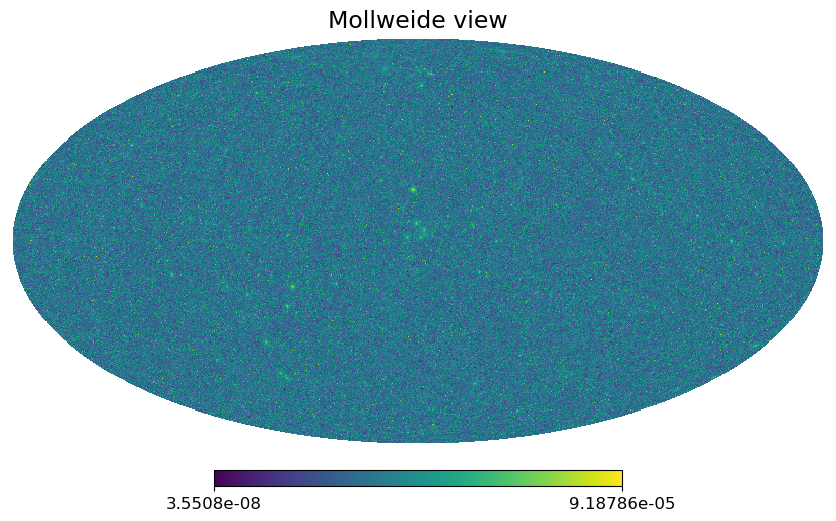

In [15]:
hp.mollview(sz_websky_map, norm="log")

In [10]:
sz_mask = hp.read_map("/Volumes/Arefe/TMP_IMPORTANT/maps/COM_Mask_Compton-SZMap_2048_R2.00.fits")

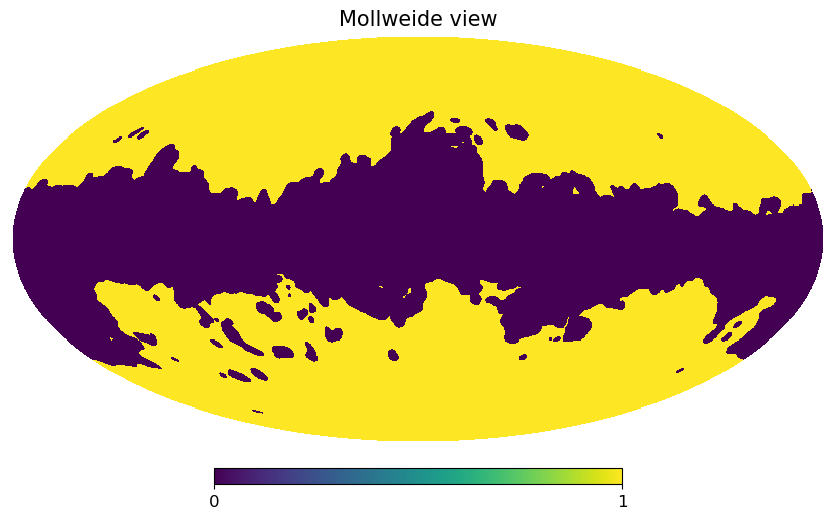

In [11]:
hp.mollview(sz_mask)

In [14]:
nside = 512


In [15]:

lmax = 3*nside -1 
res_rad = hp.nside2resol(nside, arcmin = False)
res_arcmin = hp.nside2resol(nside, arcmin = True)

In [16]:
ell = np.arange(0,lmax+1)
ellsc = 21600/ell
norm= ell * (ell+1) / (2*np.pi)

/var/folders/vj/5ltjqv9d4px7nr3d4mbmk9_m0000gn/T/ipykernel_7482/2172233455.py:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc = 21600/ell


In [17]:
jmax = 9

In [18]:
sz_milca_map = hp.ud_grade(sz_milca_map, nside_out=nside)

In [19]:
sz_websky_map = hp.ud_grade(sz_websky_map, nside_out=nside)

In [20]:
sz_magneticum_map = hp.ud_grade(sz_magneticum_map, nside_out=nside)

In [21]:
sz_nilc_map = hp.ud_grade(sz_nilc_map, nside_out=nside)

In [22]:
#sz_mat_map = hp.ud_grade(sz_mat_map, nside_out=nside)

In [23]:
sz_simons_map = hp.ud_grade(sz_simons_map, nside_out=nside)

In [24]:
sz_mask = hp.ud_grade(sz_mask, nside_out=nside)

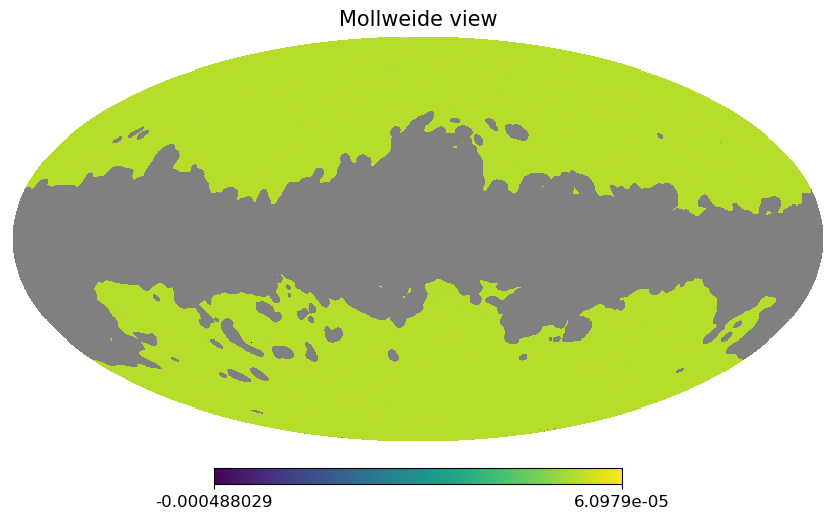

In [25]:
sz_milca_masked = hp.ma(sz_milca_map)
sz_milca_masked.mask = np.logical_not (sz_mask)
hp.mollview(sz_milca_masked)

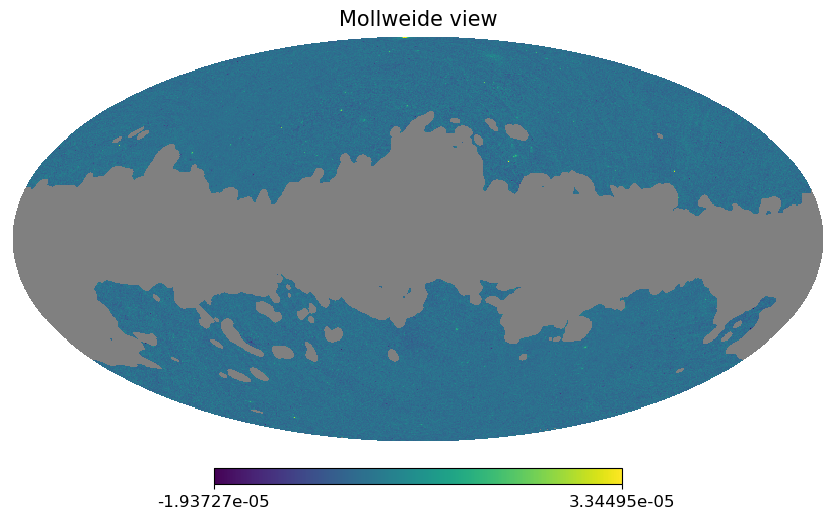

In [26]:
sz_nilc_masked = hp.ma(sz_nilc_map)
sz_nilc_masked.mask = np.logical_not (sz_mask)
hp.mollview(sz_nilc_masked)

In [27]:
theta_bin = 100000
morlet_l_arr = ST.morlet_arr(res_rad , jmax , lmax , theta_bin)

In [28]:
Jf=np.arange(jmax)
scale = 2**Jf*((2*res_arcmin)/0.75)


In [29]:
websky_s0 = np.mean(sz_websky_map)

In [30]:
milca_s0 = np.mean(sz_milca_map)

In [31]:
magneticum_s0 = np.mean(sz_magneticum_map)

In [32]:
nilc_s0 = np.mean(sz_nilc_map)

In [33]:
simons_s0 = np.mean(sz_simons_map)

In [34]:
websky_s1 , websky_i1 = ST.compS1(sz_websky_map, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [35]:
milca_s1 , milca_i1 = ST.compS1(sz_milca_masked, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [36]:
magneicum_s1 , magneticum_i1 = ST.compS1(sz_magneticum_map, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [37]:
nilc_s1 , nilc_i1 = ST.compS1(sz_nilc_masked, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [38]:
#mat_s1 , mat_i1 = ST.compS1(sz_mat_map, morlet_l_arr, jmax, nside)

In [39]:
simons_s1 , simons_i1 = ST.compS1(sz_simons_map, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [40]:

websky_s2 , websky_i2 = ST.compS2(websky_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [41]:
milca_s2 , milca_i2 = ST.compS2(milca_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [42]:
magneicum_s2 , magneticum_i2 = ST.compS2(magneticum_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [43]:
nilc_s2 , nilc_i2 = ST.compS2(nilc_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


In [44]:
mat_s2 , mat_i2 = ST.compS2(mat_i1, morlet_l_arr, jmax, nside)

NameError: name 'mat_i1' is not defined

In [45]:
simons_s2, simons_i2 = ST.compS2(simons_i1, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


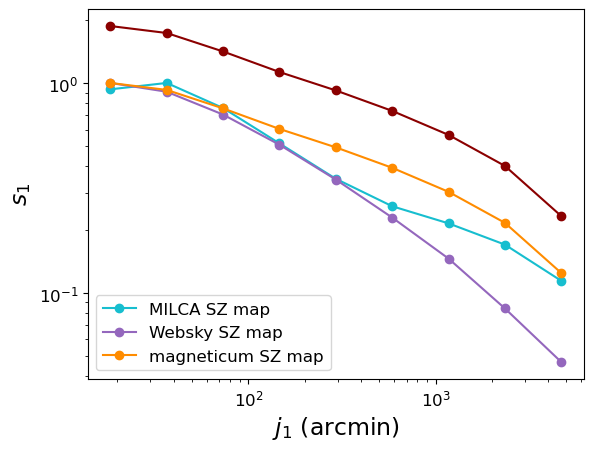

In [50]:
#plt.loglog(ellsc , dl_test)
plt.loglog(scale, np.abs(milca_s1/milca_s0)/np.max(np.abs(milca_s1/milca_s0)), 'o-', lw=1.5 , color = "tab:cyan")
plt.loglog(scale, np.abs(websky_s1/websky_s0)/np.max(np.abs(websky_s1/websky_s0)), 'o-', lw=1.5 , color = "tab:purple")
plt.loglog(scale, np.abs(magneicum_s1/magneticum_s0)/np.max(np.abs(magneicum_s1/magneticum_s0)), 'o-', lw=1.5 , color = "darkorange")
plt.loglog(scale, np.abs(magneicum_s1/magneticum_s0)/np.max(np.abs(simons_s1/simons_s0)), 'o-', lw=1.5 , color = "darkred")
#plt.loglog(ellsc ,cmb_cl*ell*(ell+1)/(2*np.pi))
#plt.loglog(ellsc ,nosz_cl*ell*(ell+1)/(2*np.pi))
plt.ylabel(r"$s_1$")
plt.xlabel(r"$j_1$ (arcmin)")
plt.legend (["MILCA SZ map","Websky SZ map" , "magneticum SZ map"])

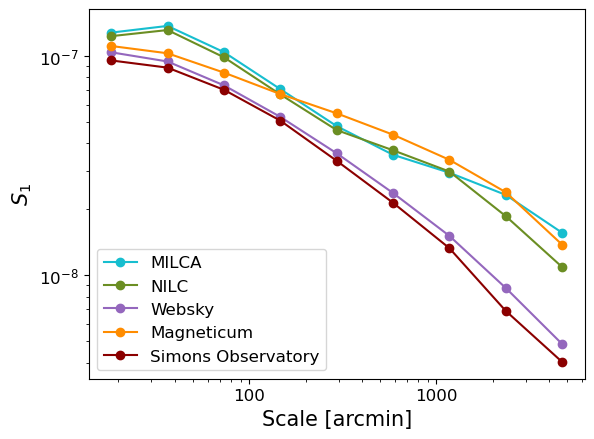

In [61]:
#plt.loglog(ellsc , dl_test)
plt.loglog(scale, milca_s1, 'o-', lw=1.5 , color = "tab:cyan")
plt.loglog (scale,nilc_s1 ,'o-', lw=1.5, color = "olivedrab")
plt.loglog(scale, websky_s1, 'o-', lw=1.5 , color = "tab:purple")
plt.loglog(scale, magneicum_s1, 'o-', lw=1.5 , color = "darkorange")
plt.loglog(scale, simons_s1, 'o-', lw=1.5 , color = "darkred")
#plt.loglog(scale, mat_s1**2, 'o-', lw=1.5 , color = "pink")
#plt.loglog (ellsc , milca_cl*ell*(ell+1)/(2*np.pi))
#plt.loglog (ellsc , websky_cl*ell*(ell+1)/(2*np.pi))
#plt.loglog (ellsc , magneicum_cl*ell*(ell+1)/(2*np.pi))
plt.ylabel(r"$S_1$")
plt.xlabel("Scale [arcmin]")
plt.xticks ([100,  1000],[100,1000])
plt.legend (["MILCA","NILC", "Websky" , "Magneticum", "Simons Observatory" ])
plt.savefig("SZ_sim_S11.pdf",bbox_inches = 'tight', pad_inches=0.1)

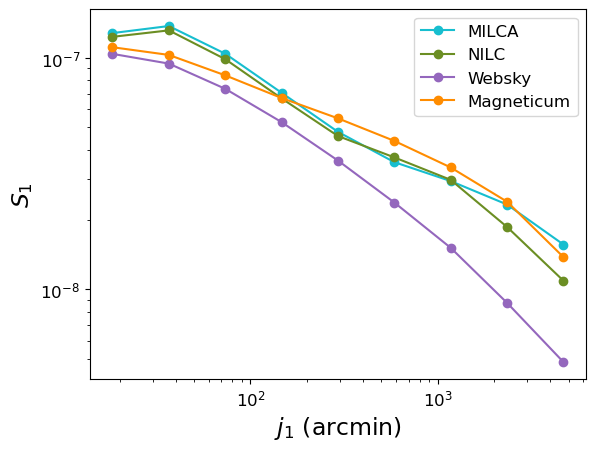

In [130]:
plt.loglog(scale, milca_s1, 'o-', lw=1.5 , color = "tab:cyan")
plt.loglog (scale,nilc_s1 ,'o-', lw=1.5, color = "olivedrab")
plt.loglog(scale, websky_s1, 'o-', lw=1.5 , color = "tab:purple")
plt.loglog(scale, magneicum_s1, 'o-', lw=1.5 , color = "darkorange")
#plt.loglog(scale, mat_s1**2, 'o-', lw=1.5 , color = "pink")
#plt.loglog (ellsc , milca_cl*ell*(ell+1)/(2*np.pi))
#plt.loglog (ellsc , websky_cl*ell*(ell+1)/(2*np.pi))
#plt.loglog (ellsc , magneicum_cl*ell*(ell+1)/(2*np.pi))
plt.ylabel(r"$S_1$")
plt.xlabel(r"$j_1$ (arcmin)")
plt.legend (["MILCA","NILC", "Websky" , "Magneticum" ])
plt.savefig("SZ_sim_S1.pdf")

In [78]:
min(sz_milca_map)

0.0

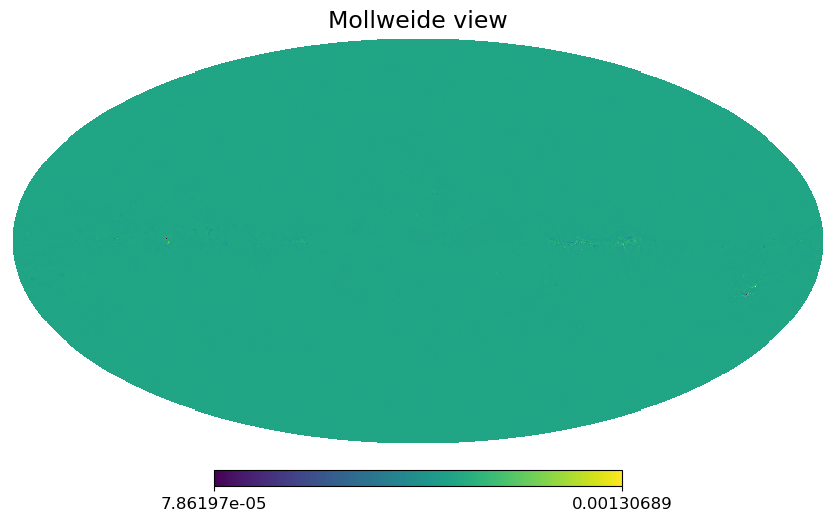

In [87]:
hp.mollview(sz_mat_map)

In [48]:
milca_cl  = hp.anafast(sz_milca_masked)

In [49]:
websky_cl = hp.anafast(sz_websky_map)

In [50]:
magneicum_cl = hp.anafast(sz_magneticum_map)

In [51]:
nilc_cl = hp.anafast(sz_nilc_masked)

In [55]:
mat_cl = hp.anafast(sz_mat_map)

In [52]:
simons_cl = hp.anafast(sz_simons_map)

In [101]:
simons_cl[0] = 0
simons_cl[1] = simons_cl[2]
simons_cl[3] = simons_cl[4]

In [90]:
nilc_cl.shape

(6144,)

In [79]:
ellsc_2048 = 21600/np.arange(0,3*2048)
ell_2048 = np.arange (0,3*2048)

/var/folders/vj/5ltjqv9d4px7nr3d4mbmk9_m0000gn/T/ipykernel_26980/976895236.py:1: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_2048 = 21600/np.arange(0,3*2048)


In [85]:
ellsc_4096 = 21600/np.arange(0,3*4096)
ell_4096 = np.arange (0,3*4096)

/var/folders/vj/5ltjqv9d4px7nr3d4mbmk9_m0000gn/T/ipykernel_26980/208469993.py:1: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_4096 = 21600/np.arange(0,3*4096)


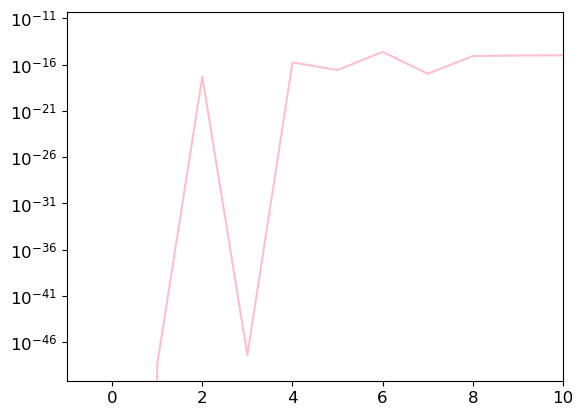

In [95]:
plt.plot (ell_4096 , simons_cl*ell_4096*(ell_4096+1)/(2*np.pi) , color = "pink")
plt.xlim (-1, 10)
plt.yscale("log")

In [91]:
simons_cl[:10]

array([2.28951303e-11, 1.21026687e-48, 5.03419353e-18, 2.11065727e-48,
       5.39503058e-17, 5.42651483e-18, 3.51858105e-16, 1.14299966e-18,
       7.16160283e-17, 6.66801854e-17])

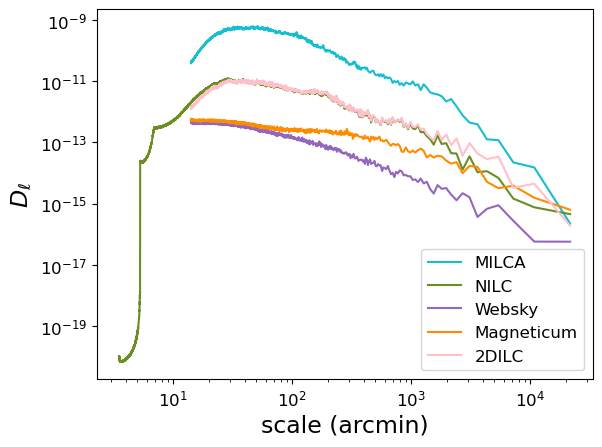

In [93]:
plt.loglog (ellsc_2048 , milca_cl*ell_2048*(ell_2048+1)/(2*np.pi) , color = "tab:cyan")
plt.loglog (ellsc_2048 , nilc_cl*ell_2048*(ell_2048+1)/(2*np.pi) , color = "olivedrab")
plt.loglog (ellsc_2048 , websky_cl*ell_2048*(ell_2048+1)/(2*np.pi) , color = "tab:purple")
plt.loglog (ellsc_2048 , magneicum_cl*ell_2048*(ell_2048+1)/(2*np.pi) , color = "darkorange")
plt.loglog (ellsc_2048 , mat_cl*ell_2048*(ell_2048+1)/(2*np.pi) , color = "pink")

plt.legend (["MILCA","NILC" , "Websky" , "Magneticum" , "2DILC"])
plt.xlabel ("scale (arcmin)") 
plt.ylabel (r"$D_\ell$")
plt.savefig("SZ_sim_cl.pdf")

In [1]:
plt.loglog (ellsc[10:] , (milca_cl*ell*(ell+1)/(2*np.pi))[10:] )

NameError: name 'plt' is not defined

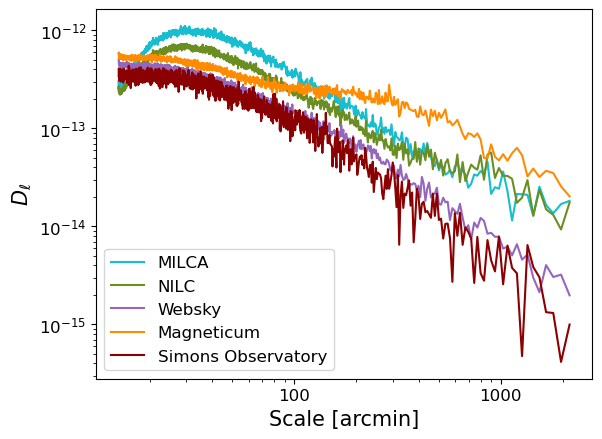

In [62]:
plt.loglog (ellsc[10:] , (milca_cl*ell*(ell+1)/(2*np.pi))[10:] , color = "tab:cyan")
plt.loglog (ellsc[10:] , (nilc_cl*ell*(ell+1)/(2*np.pi))[10:] , color = "olivedrab")
plt.loglog (ellsc[10:] , (websky_cl*ell*(ell+1)/(2*np.pi))[10:] , color = "tab:purple")
plt.loglog (ellsc[10:] , (magneicum_cl*ell*(ell+1)/(2*np.pi))[10:] , color = "darkorange")
plt.loglog (ellsc[10:] , (simons_cl*ell*(ell+1)/(2*np.pi))[10:] , color = "darkred")
#plt.loglog (ellsc , mat_cl*ell*(ell+1)/(2*np.pi) , color = "pink")
plt.legend (["MILCA","NILC" , "Websky" , "Magneticum" , "Simons Observatory"])
plt.xlabel ("Scale [arcmin]") 
plt.ylabel (r"$D_\ell$") 
plt.xticks ([100,  1000],[100,1000])
plt.savefig("SZ_sim_cll.pdf",bbox_inches = 'tight', pad_inches=0.1)


In [109]:
ellsc[:-5]

array([           inf, 2.16000000e+04, 1.08000000e+04, ...,
       1.41361257e+01, 1.41268803e+01, 1.41176471e+01])

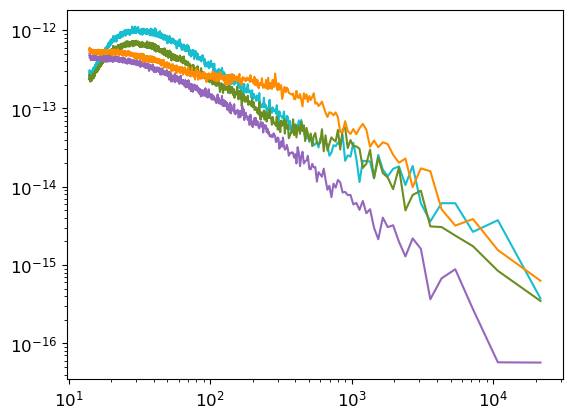

In [112]:
plt.loglog (ellsc , milca_cl*ell*(ell+1)/(2*np.pi) , color = "tab:cyan")
plt.loglog (ellsc , nilc_cl*ell*(ell+1)/(2*np.pi) , color = "olivedrab")
plt.loglog (ellsc , websky_cl*ell*(ell+1)/(2*np.pi) , color = "tab:purple")
plt.loglog (ellsc , magneicum_cl*ell*(ell+1)/(2*np.pi) , color = "darkorange")
#plt.loglog (ellsc , simons_cl*ell*(ell+1)/(2*np.pi) , color = "darkred")

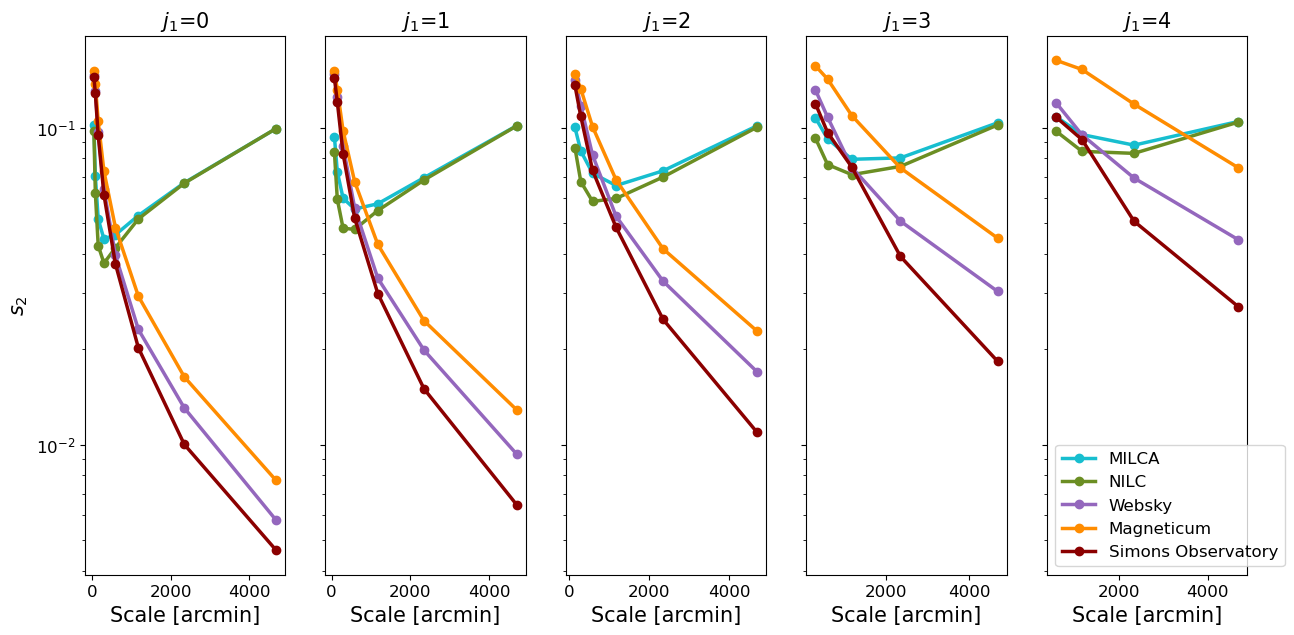

In [60]:
fig, ax = plt.subplots(1, 5,sharey=True,squeeze=True,figsize=(15,7))
for j in range (5):
    ax[j].plot (scale[j+1:],milca_s2[j,j+1:]/milca_s1[j],'o-' , color = "tab:cyan" , lw = 2.5)
    ax[j].plot (scale[j+1:],nilc_s2[j,j+1:]/nilc_s1[j],'o-' , color = "olivedrab" , lw = 2.5)
    ax[j].plot (scale[j+1:],websky_s2[j,j+1:]/websky_s1[j],'o-' , color = "tab:purple" , lw = 2.5)
    ax[j].plot (scale[j+1:],magneicum_s2[j,j+1:]/magneicum_s1[j],'o-' , color = "darkorange" ,lw = 2.5)
    ax[j].plot (scale[j+1:],simons_s2[j,j+1:]/simons_s1[j],'o-' , color = "darkred" ,lw = 2.5)
    #ax[j].plot (scale[j+1:],mat_s2[j,j+1:]/mat_s1[j],'o-' , color = "pink" ,lw = 2.5)
    #ax[j].plot (scale,milca_s2[j,:]/milca_s1[j],'o-', alpha = 0.4 , color = "tab:cyan")
    #ax[j].plot (scale,nilc_s2[j,:]/nilc_s1[j],'o-' ,alpha = 0.4, color = "olivedrab" )
    #ax[j].plot (scale,websky_s2[j,:]/websky_s1[j],'o-' , alpha = 0.4 , color = "tab:purple")
    #ax[j].plot (scale,magneicum_s2[j,:]/magneicum_s1[j],'o-' ,  alpha = 0.4, color = "darkorange")
    ax[j].set_title(r"$j_1$=%d"%j)
    ax[j].set_xlabel("Scale [arcmin]")
    ax[j].set_yscale('log')
ax[0].set_ylabel(r"$s_2$" )
plt.legend (["MILCA","NILC","Websky" , "Magneticum", "Simons Observatory"])
plt.savefig("SZ_sim_S22.pdf",bbox_inches = 'tight', pad_inches=0.1)

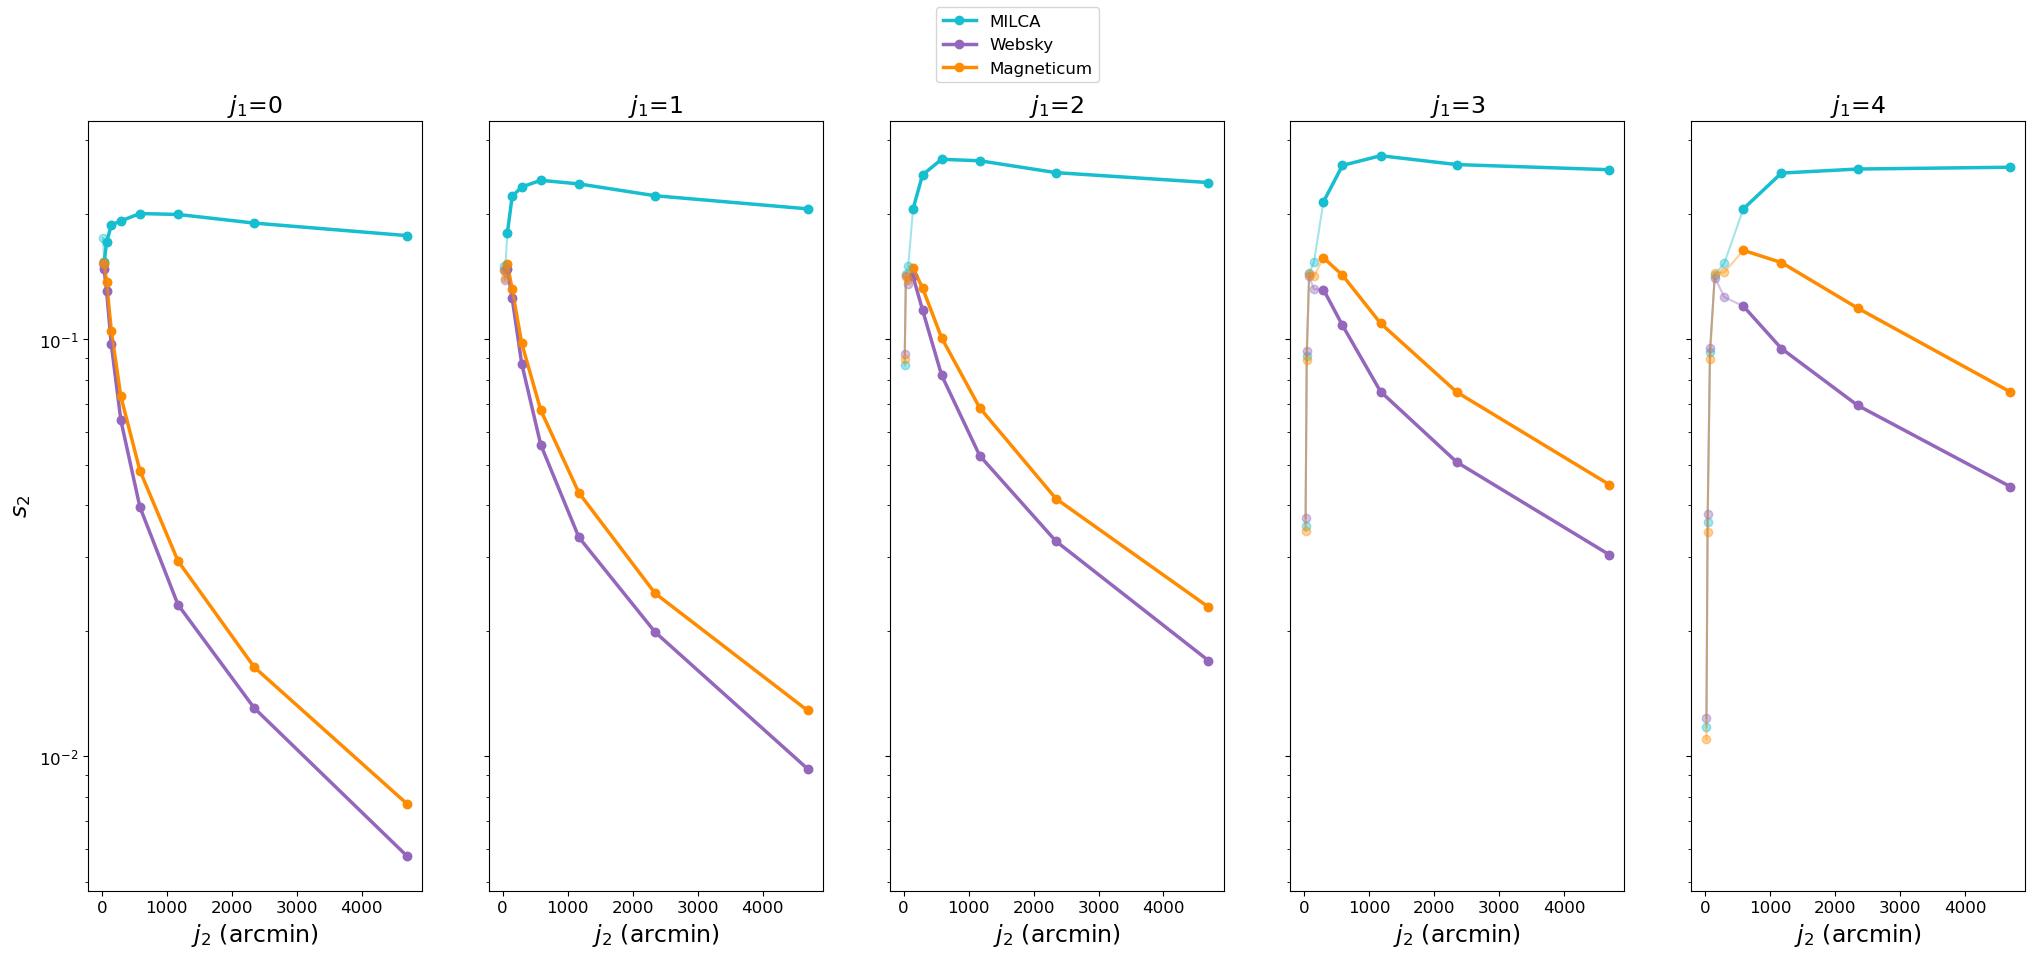

In [84]:
fig, ax = plt.subplots(1, 5,sharey=True,squeeze=True,figsize=(25,10))
for j in range (5):
    ax[j].plot (scale[j+1:],milca_s2[j,j+1:]/milca_s1[j],'o-' , color = "tab:cyan" , lw = 2.5)
    ax[j].plot (scale[j+1:],websky_s2[j,j+1:]/websky_s1[j],'o-' , color = "tab:purple" , lw = 2.5)
    ax[j].plot (scale[j+1:],magneicum_s2[j,j+1:]/magneicum_s1[j],'o-' , color = "darkorange" ,lw = 2.5)
    ax[j].plot (scale,milca_s2[j,:]/milca_s1[j],'o-', alpha = 0.4 , color = "tab:cyan")
    ax[j].plot (scale,websky_s2[j,:]/websky_s1[j],'o-' , alpha = 0.4 , color = "tab:purple")
    ax[j].plot (scale,magneicum_s2[j,:]/magneicum_s1[j],'o-' ,  alpha = 0.4, color = "darkorange")
    ax[j].set_title(r"$j_1$=%d"%j)
    ax[j].set_xlabel(r"$j_2$ (arcmin)")
    ax[j].set_yscale('log')
ax[0].set_ylabel(r"$s_2$" )
fig.legend (["MILCA","Websky" , "Magneticum"], loc='upper center')
plt.savefig("SZ_sim_S2_withlights.pdf")

In [85]:
websky_cl

array([1.44344157e-11, 1.78520115e-16, 5.99420466e-17, ...,
       1.30101105e-18, 1.32288481e-18, 1.34528498e-18])

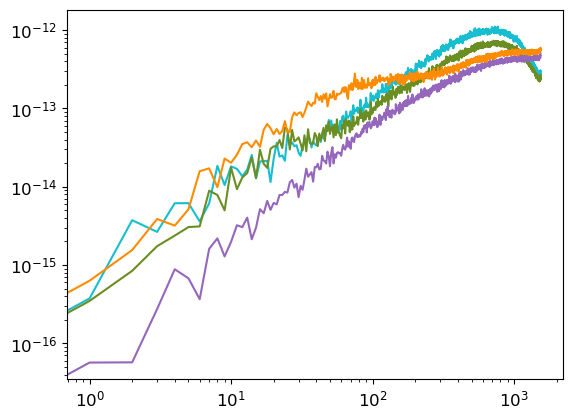

In [142]:
plt.loglog (ell , milca_cl*ell*(ell+1)/(2*np.pi) , color = "tab:cyan")
plt.loglog (ell , nilc_cl*ell*(ell+1)/(2*np.pi) , color = "olivedrab")
#plt.loglog (ell , mat_cl*ell*(ell+1)/(2*np.pi) , color = "pink")
plt.loglog (ell , websky_cl*ell*(ell+1)/(2*np.pi) , color = "tab:purple")
plt.loglog (ell , magneicum_cl*ell*(ell+1)/(2*np.pi) , color = "darkorange")
plt.
plt.savefig("")

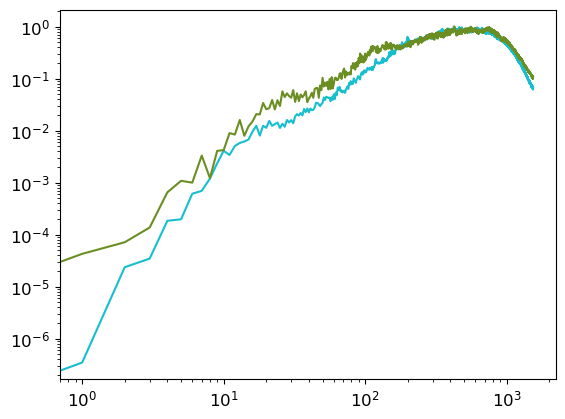

In [83]:
plt.loglog (ell , milca_cl*ell*(ell+1)/(2*np.pi)/np.max(milca_cl*ell*(ell+1)/(2*np.pi)) , color = "tab:cyan")
plt.loglog (ell , nilc_cl*ell*(ell+1)/(2*np.pi)/np.max(nilc_cl*ell*(ell+1)/(2*np.pi)) , color = "olivedrab")
#plt.loglog (ell , mat_cl*ell*(ell+1)/(2*np.pi)/np.max(mat_cl*ell*(ell+1)/(2*np.pi)) , color = "pink")
#plt.loglog (ell , websky_cl*ell*(ell+1)/(2*np.pi)/np.max(websky_cl*ell*(ell+1)/(2*np.pi)) , color = "tab:purple")
#plt.loglog (ell , magneicum_cl*ell*(ell+1)/(2*np.pi)/np.max(magneicum_cl*ell*(ell+1)/(2*np.pi)) , color = "darkorange")

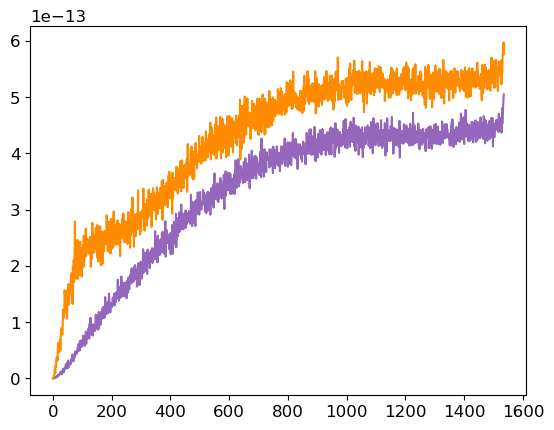

In [22]:
#plt.plot (ell , milca_cl*ell*(ell+1)/(2*np.pi) , color = "tab:cyan")
plt.plot (ell , websky_cl*ell*(ell+1)/(2*np.pi) , color = "tab:purple")
plt.plot (ell , magneicum_cl*ell*(ell+1)/(2*np.pi) , color = "darkorange")

In [59]:
milca_s3 = ST.compS3(milca_i2, morlet_l_arr, jmax, nside)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 2
1 3
1 4
1 5
1 6
1 7
1 8


KeyboardInterrupt: 